In [1]:
# from model import LLM
# model = LLM()
# model = LLM('outputs_gemma-ko-2b/checkpoint-1827') # 훈련된 모델을 가져올 수 있음
# model = LLM(prompt = prompt) 프롬프트를 지정하여 훈련 / 추론할 수 있음
# model.make_dataset() # traindataset을 만듬 (model.train_dataset으로 결과를 볼 수 있음)
# model.view_data(idx) # idx에 해당하는 전처리된 데이터를 자연어의 형태로 확인
# model.train() # 만든 traindataset으로 훈련
# model.inference() # 훈련된 모델을 바탕으로 추론 / 기본값 : logit_base
# model.inference(mode = 'generative_base') # 생성 방식으로 추론 / 간혹 생성이 잘못된건 1로 내보냄

In [2]:
from model import LLM

In [ ]:
model = LLM(prompt='baseline')

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
model.make_dataset()
model.train_dataset

Tokenizing:   0%|          | 0/2031 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2031 [00:00<?, ? examples/s]

max token length: 1531
min token length: 113
avg token length: 616.6447728516694


Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 1827
})

In [5]:
model.train()

assistant<|end_header_id|> 부터 로스를 계산합니다.


Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.000100,0.253088,0.867647
2,0.000200,0.365676,0.887255


In [6]:
model = LLM('outputs_Llama-3.2-Rabbit-Ko-3B-Instruct/checkpoint-3654')

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
# model.inference(mode = 'generative_base')
model.inference(mode = 'logit_base')

  0%|          | 0/869 [00:00<?, ?it/s]/data/ephemeral/home/level2-nlp-generationfornlp-nlp-09-lv3/Template/model.py:354: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.softmax(
100%|██████████| 869/869 [07:13<00:00,  2.01it/s]


answer
1    308
2    194
3    165
4    145
5     57
Name: count, dtype: int64


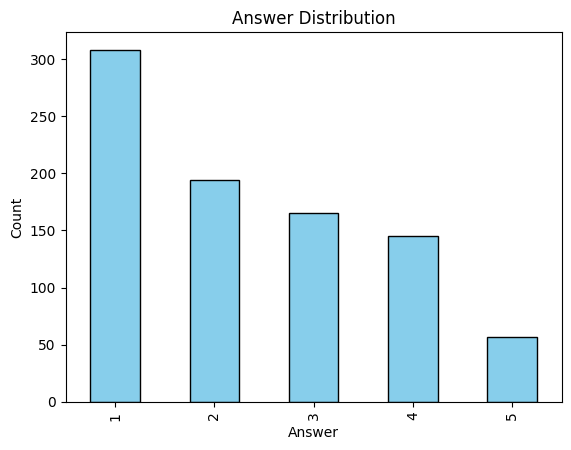

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

output = pd.read_csv('./output_logit_base.csv')
# infer_results가 이미 DataFrame으로 존재한다고 가정
answer_distribution = output['answer'].value_counts()

# 결과 출력
print(answer_distribution)

# 시각화
answer_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Answer Distribution')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.show()

In [9]:
# Bllossom/llama-3.2-Korean-Bllossom-3B